In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from statsmodels.tsa.stattools import adfuller as adf
from sklearn.metrics import r2_score
from sklearn.mixture import GaussianMixture

In [2]:
gdp = pd.read_csv("US_Nominal_GDP.csv")
debt = pd.read_csv("public_debt.csv")
gdp = gdp.rename(columns={'DATE': 'date', 'NGDPSAXDCUSQ': 'value'})

In [3]:
gdp = gdp.iloc[64:len(gdp)-5, :].reset_index().iloc[:, 1:]

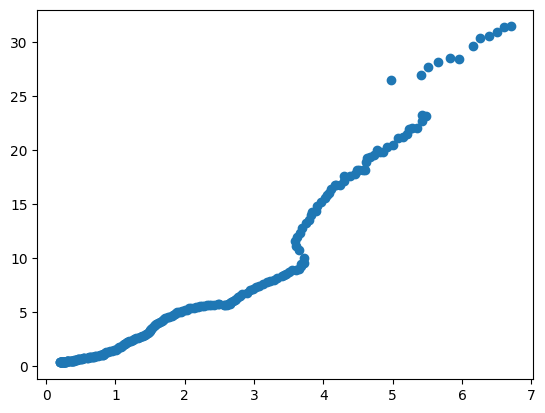

In [4]:
X = np.array(gdp["value"])
Y = np.array(debt["value"])
X = X/1e6
Y = Y/1e6
plt.scatter(X, Y)

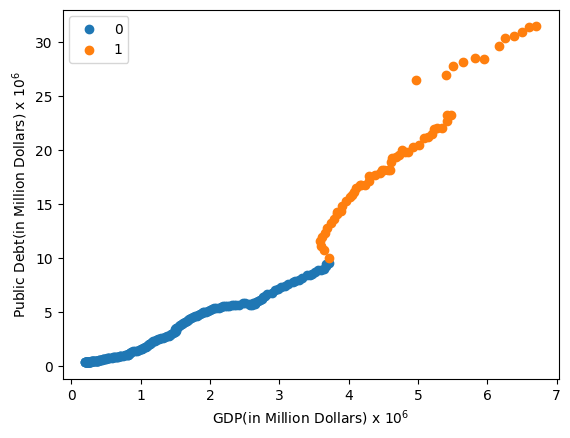

In [5]:
mix = [[X[i], Y[i]] for i in range(len(X))]
gmm = GaussianMixture(n_components=2).fit(mix)
Z = gmm.predict(mix)

plt.scatter(X[Z == 0], Y[Z == 0], label = 0)
plt.scatter(X[Z == 1], Y[Z == 1], label = 1)
plt.xlabel(r"GDP(in Million Dollars) x $10^{6}$")
plt.ylabel(r"Public Debt(in Million Dollars) x $10^{6}$")
plt.legend()
plt.show()